# 互评作业4：离群点分析与异常检测
3120190981 陈雨馨 数据集：wine_benchmarks & abalone_benchmarks

## 1 对数据集进行离群点检测

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


### pyod内置五种离群点检测模型对数据集进行离群点检测

In [2]:
def oldect(data,wine_auc,row,ylabel):
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)
# 设置 10%的离群点数据
    random_state = np.random.RandomState(370)
    outliers_fraction = 0.1
# 定义5个后续会使用的离群点检测模型
    classifiers = {
        "Feature Bagging" : FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state = random_state),
        "Histogram-base Outlier Detection(HBOS)" : HBOS(contamination=outliers_fraction),
        "Isolation Forest" :IForest(contamination=outliers_fraction,random_state = random_state),
        "KNN" : KNN(contamination=outliers_fraction),
        "Average KNN" :KNN(method='mean',contamination=outliers_fraction)
    }

#逐一 比较模型
    col = 0
    for i ,(clf_name,clf) in enumerate(classifiers.items()):
        clf.fit(data)
    # 预测利群得分
        scores_pred = clf.decision_function(data)*-1
    # 预测数据点是否为 离群点
        y_pred = clf.predict(data)
        n_inliers = len(y_pred)-np.count_nonzero(y_pred)
        n_outliers = np.count_nonzero(y_pred==1)
    
        fpr, tpr, thresholds = roc_curve(ylabel, y_pred, pos_label=1)
        wine_auc[row][col] = auc(fpr, tpr)
        col=col+1
    return

### 对离群点标签进行标注

In [3]:
def getlabel(attr):
    j = 0
    ylabel = [0]*len(attr)
    for i in attr:
        if i == 'anomaly':
            ylabel[j] = 1 
        j=j+1 
    return ylabel

### 检测数据集中离群点，并用auc表示模型检测性能

In [4]:
wine_auc = [[0] * 5 for i in range(1680) ]
for i in range(1680):
    root = 'E:/DataMining/hw4/wine/benchmarks/wine_benchmark_'
    path = str(i+1).zfill(4)+'.csv'
    df = pd.read_csv(root+path)
    col = df.shape[1]
    data = df.iloc[:,6:col]
    ylabel = getlabel(df['ground.truth'])
    oldect(data,wine_auc,i,ylabel)

In [5]:
abalone_auc = [[0] * 5 for i in range(1800) ]
for i in range(1800):
    root = 'E:/DataMining/hw4/abalone/benchmarks/abalone_benchmark_'
    path = str(i+1).zfill(4)+'.csv'
    df = pd.read_csv(root+path)
    col = df.shape[1]
    data = df.iloc[:,6:col]
    ylabel = getlabel(df['ground.truth'])
    oldect(data,abalone_auc,i,ylabel)

In [6]:
wine_df = pd.DataFrame(wine_auc, columns=['FeatureBagging','HBOS','IForest','KNN','AverageKNN'])
abalone_df = pd.DataFrame(abalone_auc, columns=['FeatureBagging','HBOS','IForest','KNN','AverageKNN'])
wine_df.to_csv("wine_auc1.csv", index=False)
abalone_df.to_csv("abalone_auc1.csv", index=False)

## 2 对离群点检测结果进行可视化分析

In [7]:
wine = pd.read_csv('wine_auc.csv')
abalone = pd.read_csv('abalone_auc.csv')

In [8]:
wine

,FeatureBagging,HBOS,IForest,KNN,AverageKNN
0,0.519800,0.524225,0.522467,0.520484,0.509334
1,0.517770,0.514660,0.518228,0.514017,0.507260
2,0.514113,0.520252,0.519669,0.514192,0.511276
3,0.511809,0.513133,0.521219,0.516455,0.514249
4,0.514549,0.519538,0.524810,0.527984,0.513060
...,...,...,...,...,...
1675,0.509510,0.505118,0.499462,0.497641,0.505792
1676,0.512543,0.516798,0.523904,0.512552,0.499003
1677,0.509332,0.499198,0.502011,0.499213,0.501968
1678,0.517041,0.536265,0.512230,0.499939,0.496744


In [9]:
abalone

,FeatureBagging,HBOS,IForest,KNN,AverageKNN
0,0.507341,0.540320,0.509123,0.556496,0.533381
1,0.510420,0.529450,0.509322,0.554969,0.526712
2,0.496353,0.539177,0.498827,0.553446,0.523065
3,0.516116,0.545990,0.507232,0.555459,0.527747
4,0.520833,0.535666,0.496505,0.549318,0.527040
...,...,...,...,...,...
1795,0.490130,0.487136,0.482862,0.486290,0.498717
1796,0.503339,0.517011,0.508463,0.495225,0.499572
1797,0.500587,0.487534,0.483191,0.498451,0.502596
1798,0.486588,0.504103,0.478454,0.505001,0.497427


### 对数据集中各模型auc值进行处理，剔除缺失值

In [10]:
wine=wine[~wine.isin([0])]
wine = wine.dropna()
wine.reset_index(drop=True, inplace=True)
wine

,FeatureBagging,HBOS,IForest,KNN,AverageKNN
0,0.519800,0.524225,0.522467,0.520484,0.509334
1,0.517770,0.514660,0.518228,0.514017,0.507260
2,0.514113,0.520252,0.519669,0.514192,0.511276
3,0.511809,0.513133,0.521219,0.516455,0.514249
4,0.514549,0.519538,0.524810,0.527984,0.513060
...,...,...,...,...,...
1205,0.509510,0.505118,0.499462,0.497641,0.505792
1206,0.512543,0.516798,0.523904,0.512552,0.499003
1207,0.509332,0.499198,0.502011,0.499213,0.501968
1208,0.517041,0.536265,0.512230,0.499939,0.496744


In [11]:
abalone=abalone[~abalone.isin([0])]
abalone = abalone.dropna()
abalone.reset_index(drop=True, inplace=True)
abalone

,FeatureBagging,HBOS,IForest,KNN,AverageKNN
0,0.507341,0.540320,0.509123,0.556496,0.533381
1,0.510420,0.529450,0.509322,0.554969,0.526712
2,0.496353,0.539177,0.498827,0.553446,0.523065
3,0.516116,0.545990,0.507232,0.555459,0.527747
4,0.520833,0.535666,0.496505,0.549318,0.527040
...,...,...,...,...,...
1720,0.490130,0.487136,0.482862,0.486290,0.498717
1721,0.503339,0.517011,0.508463,0.495225,0.499572
1722,0.500587,0.487534,0.483191,0.498451,0.502596
1723,0.486588,0.504103,0.478454,0.505001,0.497427


### 对离群点检测模型在wine数据集中性能进行分析

In [12]:
wineFB = wine['FeatureBagging'].mean()
wineHBOS = wine['HBOS'].mean()
wineIF = wine['IForest'].mean()
wineKNN = wine['KNN'].mean()
wineAKNN = wine['AverageKNN'].mean()
print(wineFB, wineHBOS, wineIF, wineKNN, wineAKNN)

0.52026018452685 0.5231204290849927 0.5236977490588618 0.5270902429060297 0.5137337734821439


{'whiskers': [<matplotlib.lines.Line2D at 0x1592e63f888>,
 'caps': [<matplotlib.lines.Line2D at 0x1592e66dc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1592e574ec8>,
 'medians': [<matplotlib.lines.Line2D at 0x1592e1d8e08>,
 'fliers': [<matplotlib.lines.Line2D at 0x1592e1d8f08>,
 'means': []}

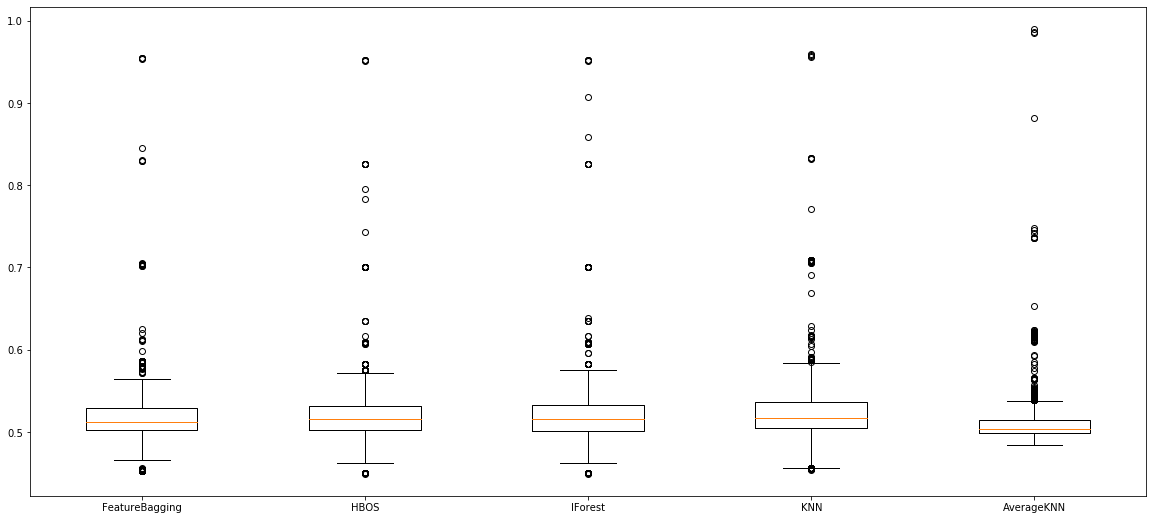

In [13]:
d1 = wine['FeatureBagging']
d2 = wine['HBOS']
d3 = wine['IForest']
d4 = wine['KNN']
d5 = wine['AverageKNN']
d = [d1,d2,d3,d4,d5]
plt.figure(figsize=(20,9))
labels=['FeatureBagging','HBOS','IForest','KNN','AverageKNN']
plt.boxplot(d,labels=labels)

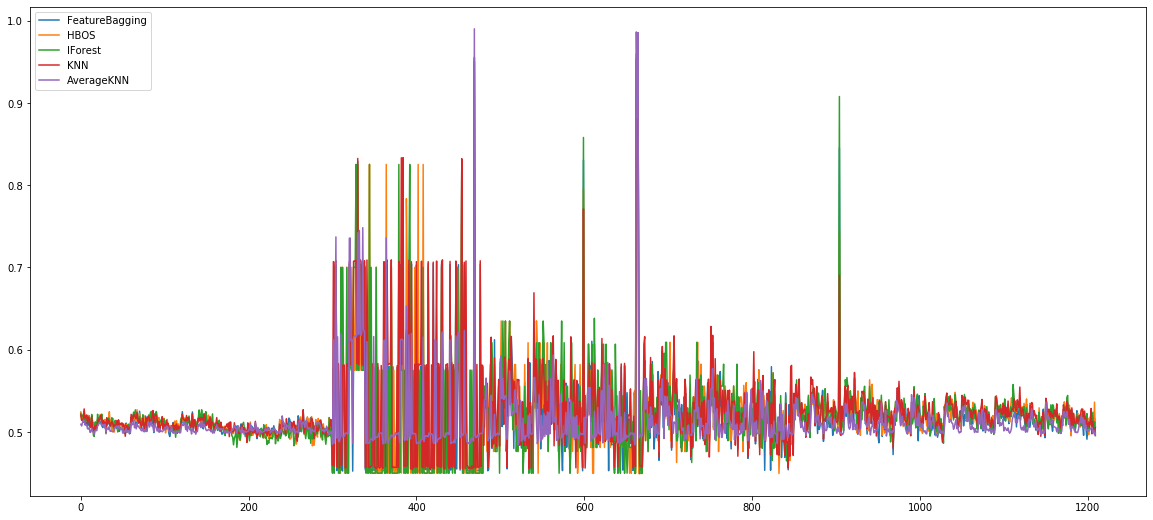

In [14]:
plt.figure(figsize=(20,9))
plt.plot(wine['FeatureBagging'],label='FeatureBagging')
plt.plot(wine['HBOS'],label='HBOS')
plt.plot(wine['IForest'],label='IForest')
plt.plot(wine['KNN'],label='KNN')
plt.plot(wine['AverageKNN'],label='AverageKNN')
plt.legend(loc = "upper left")

从图中可以看出，对于wine这一数据集，大部分csv文件的离群点检测结果的AUC值都在0.5左右，五种模型性能相差无几，AUC值的异常点都较多。

### 对离群点检测模型在abalone数据集中性能进行分析

In [15]:
abaloneFB = abalone['FeatureBagging'].mean()
abaloneHBOS = abalone['HBOS'].mean()
abaloneIF = abalone['IForest'].mean()
abaloneKNN = abalone['KNN'].mean()
abaloneAKNN = abalone['AverageKNN'].mean()
print(abaloneFB, abaloneHBOS, abaloneIF, abaloneKNN, abaloneAKNN)

0.5811482824823266 0.6506829371717173 0.6180904786287348 0.6098389793089132 0.5700877916404796


{'whiskers': [<matplotlib.lines.Line2D at 0x1592e1f5b88>,
 'caps': [<matplotlib.lines.Line2D at 0x1592e1f5d88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1592e1f5488>,
 'medians': [<matplotlib.lines.Line2D at 0x1592e22ad88>,
 'fliers': [<matplotlib.lines.Line2D at 0x1592e22ae08>,
 'means': []}

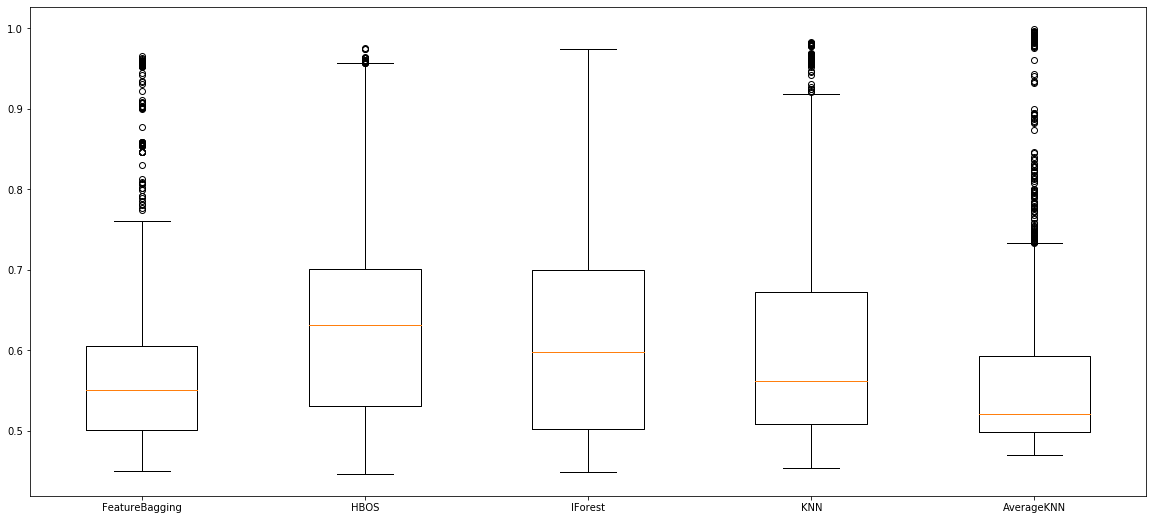

In [16]:
d1 = abalone['FeatureBagging']
d2 = abalone['HBOS']
d3 = abalone['IForest']
d4 = abalone['KNN']
d5 = abalone['AverageKNN']
d = [d1,d2,d3,d4,d5]
plt.figure(figsize=(20,9))
labels=['FeatureBagging','HBOS','IForest','KNN','AverageKNN']
plt.boxplot(d,labels=labels)

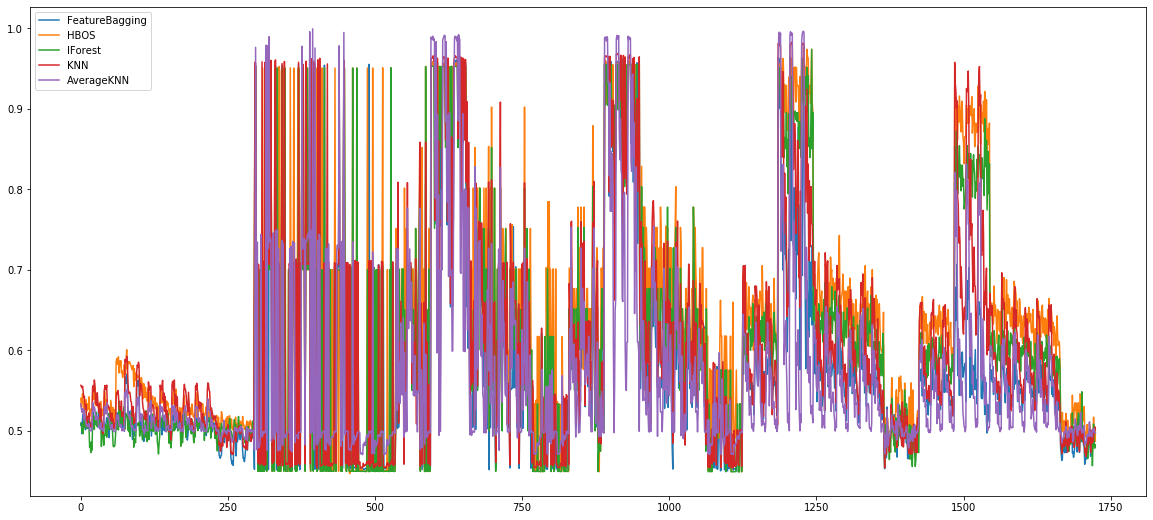

In [17]:
plt.figure(figsize=(20,9))
plt.plot(abalone['FeatureBagging'],label='FeatureBagging')
plt.plot(abalone['HBOS'],label='HBOS')
plt.plot(abalone['IForest'],label='IForest')
plt.plot(abalone['KNN'],label='KNN')
plt.plot(abalone['AverageKNN'],label='AverageKNN')
plt.legend(loc = "upper left")

从图中可以看出，对于abalone这一数据集，大部分csv文件的离群点检测结果的AUC值都在0.6左右，五种模型性能略有差异。其中，FeatureBagging、KNN和AverageKNN模型AUC值的异常点较多，HBOS和IForest这两个模型AUC值的异常点较少。